In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import csv
from csv import reader

Loading the pre processed Abstract Dataset

In [ ]:
data = pd.read_csv("20-newsgroups-dataset.csv")
data.head()

,"From: koberg@spot.Colorado.EDU (Allen Koberg) Subject: Packet Radio on the PC Nntp-Posting-Host: spot.colorado.edu Organization: University of Colorado, Boulder Lines: 6 I'm looking for any and all information regarding packet radio implementation on the PC. Software, hardware, whatever. Please e-mail any info to koberg@spot.colorado.edu. Thanks",sci_electronics
0,From: ricardo@rchland.vnet.ibm.com (Ricardo He...,comp_graphics
1,From: tedebear@leland.Stanford.EDU (Theodore C...,rec_autos
2,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,soc_religion_christian
3,From: hambidge@bms.com Subject: Re: I believe ...,talk_politics_guns
4,From: donb@netcom.com (Don Baldwin) Subject: R...,talk_politics_guns


In [ ]:
len(data.axes[0])

18845

In [ ]:
abstract = []
with open ("20-newsgroups-dataset.csv",'r') as read_obj:
  csv_reader=reader(read_obj)
  for row in csv_reader:
    abstract.append(row)
print(len(abstract))

18847


In [ ]:
print(abstract[:10])

[["From: koberg@spot.Colorado.EDU (Allen Koberg) Subject: Packet Radio on the PC Nntp-Posting-Host: spot.colorado.edu Organization: University of Colorado, Boulder Lines: 6 I'm looking for any and all information regarding packet radio implementation on the PC. Software, hardware, whatever. Please e-mail any info to koberg@spot.colorado.edu. Thanks", 'sci_electronics'], ["From: ricardo@rchland.vnet.ibm.com (Ricardo Hernandez Muchado) Subject: Re: Newsgroup Split Disclaimer: This posting represents the poster's views, not necessarily those of IBM Nntp-Posting-Host: rs43873.rchland.ibm.com Organization: IBM Rochester Lines: 21 In article <1quvdoINN3e7@srvr1.engin.umich.edu>, tdawson@engin.umich.edu (Chris Herringshaw) writes: |> Concerning the proposed newsgroup split, I personally am not in favor of |> doing this. I learn an awful lot about all aspects of graphics by reading |> this group, from code to hardware to algorithms. I just think making 5 |> different groups out of this is a wa

In [ ]:
abstract=abstract[1:]

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("popular")
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    | 

In [ ]:
print(abstract[0])

["From: ricardo@rchland.vnet.ibm.com (Ricardo Hernandez Muchado) Subject: Re: Newsgroup Split Disclaimer: This posting represents the poster's views, not necessarily those of IBM Nntp-Posting-Host: rs43873.rchland.ibm.com Organization: IBM Rochester Lines: 21 In article <1quvdoINN3e7@srvr1.engin.umich.edu>, tdawson@engin.umich.edu (Chris Herringshaw) writes: |> Concerning the proposed newsgroup split, I personally am not in favor of |> doing this. I learn an awful lot about all aspects of graphics by reading |> this group, from code to hardware to algorithms. I just think making 5 |> different groups out of this is a wate, and will only result in a few posts |> a week per group. I kind of like the convenience of having one big forum |> for discussing all aspects of graphics. Anyone else feel this way? |> Just curious. |> |> |> Daemon |> I agree with you. -------------------------------------- Raist New A1200 owner 320<->1280 in x, 200<->600 in y in 256,000+ colors from a 24-bit palette

In [ ]:
abs_final=[]
for i in abstract:
  abs_final.append(i)

#Tokenization (final step in our cleaning of data) is performed using Regular Expression Tokeinzer from nltk package. 
tokenizer = RegexpTokenizer(r'\w+') #matches all word characters until a non word character like " " is found.
text=[]
for i in range(len(abs_final)):
  #tokenize the document string
  tokens=tokenizer.tokenize(str(abstract[i]))
  text.append(tokens)

In [ ]:
#creating bag of words parameter
import gensim
from gensim import corpora,models

#Dictionary() function creates a term dictionary of our corpus, where every unique term is assigned an index and word count is also maintained.
dictionary = corpora.Dictionary(text)

# print(dictionary.token2id) can be used to see each unique id assigned to each unique word.

#Converts list of documents (corpus) into bag of words using dictionary prepared above. Output is a list of list of tuples with first tern the unique id and the second term the frequency.
doc_term_matrix = [dictionary.doc2bow(abst, allow_update=True) for abst in text]

**Number of Topics=4**

In [ ]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=4, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.143*"AX" + 0.021*"M" + 0.012*"Q" + 0.011*"R" + 0.011*"3" + 0.010*"MAX" + 0.010*"G" + 0.009*"P" + 0.008*"W" + 0.008*"I"
Topic: 1 
Words: 0.020*"the" + 0.016*"I" + 0.014*"to" + 0.013*"a" + 0.011*"and" + 0.010*"of" + 0.009*"1" + 0.009*"for" + 0.007*"is" + 0.007*"0"
Topic: 2 
Words: 0.039*"the" + 0.030*"of" + 0.019*"and" + 0.015*"to" + 0.015*"in" + 0.013*"a" + 0.011*"is" + 0.008*"that" + 0.007*"for" + 0.006*"I"
Topic: 3 
Words: 0.044*"the" + 0.026*"to" + 0.019*"a" + 0.019*"of" + 0.017*"I" + 0.016*"and" + 0.015*"that" + 0.014*"is" + 0.012*"in" + 0.009*"it"


**Number of Topics=5**

In [ ]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=5, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.025*"the" + 0.017*"to" + 0.016*"a" + 0.016*"I" + 0.015*"and" + 0.013*"of" + 0.010*"in" + 0.009*"for" + 0.008*"edu" + 0.007*"is"
Topic: 1 
Words: 0.042*"the" + 0.021*"to" + 0.020*"of" + 0.016*"a" + 0.016*"is" + 0.015*"and" + 0.014*"I" + 0.010*"in" + 0.010*"that" + 0.009*"it"
Topic: 2 
Words: 0.038*"the" + 0.021*"of" + 0.019*"to" + 0.014*"and" + 0.013*"a" + 0.009*"in" + 0.009*"that" + 0.008*"X" + 0.008*"is" + 0.008*"for"
Topic: 3 
Words: 0.043*"the" + 0.024*"of" + 0.024*"to" + 0.018*"a" + 0.017*"and" + 0.017*"that" + 0.015*"I" + 0.014*"in" + 0.012*"is" + 0.010*"it"
Topic: 4 
Words: 0.143*"AX" + 0.021*"M" + 0.012*"3" + 0.012*"Q" + 0.011*"R" + 0.010*"G" + 0.010*"I" + 0.010*"MAX" + 0.010*"1" + 0.010*"0"


**Number of Topics=6**

In [ ]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=6, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"the" + 0.018*"edu" + 0.014*"I" + 0.014*"a" + 0.014*"of" + 0.013*"to" + 0.010*"and" + 0.009*"for" + 0.008*"that" + 0.008*"is"
Topic: 1 
Words: 0.089*"AX" + 0.026*"the" + 0.017*"to" + 0.017*"of" + 0.016*"is" + 0.016*"a" + 0.014*"that" + 0.011*"I" + 0.010*"and" + 0.010*"you"
Topic: 2 
Words: 0.025*"M" + 0.014*"1" + 0.013*"R" + 0.013*"_" + 0.012*"G" + 0.011*"3" + 0.011*"W" + 0.010*"AX" + 0.010*"2" + 0.010*"Q"
Topic: 3 
Words: 0.030*"the" + 0.023*"I" + 0.018*"a" + 0.017*"to" + 0.013*"and" + 0.012*"of" + 0.011*"in" + 0.009*"is" + 0.009*"for" + 0.008*"it"
Topic: 4 
Words: 0.049*"the" + 0.026*"to" + 0.025*"of" + 0.020*"and" + 0.017*"a" + 0.014*"in" + 0.013*"that" + 0.013*"is" + 0.012*"I" + 0.008*"it"
Topic: 5 
Words: 0.019*"0" + 0.019*"the" + 0.015*"1" + 0.013*"of" + 0.012*"to" + 0.011*"and" + 0.011*"X" + 0.010*"2" + 0.010*"a" + 0.008*"in"


**Number of Topics=7**

In [ ]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.028*"the" + 0.020*"of" + 0.018*"a" + 0.018*"to" + 0.016*"I" + 0.015*"and" + 0.012*"is" + 0.010*"for" + 0.010*"in" + 0.009*"edu"
Topic: 1 
Words: 0.040*"the" + 0.027*"to" + 0.025*"of" + 0.018*"and" + 0.017*"that" + 0.017*"is" + 0.016*"a" + 0.016*"I" + 0.014*"in" + 0.010*"it"
Topic: 2 
Words: 0.048*"the" + 0.020*"to" + 0.019*"a" + 0.019*"of" + 0.016*"and" + 0.013*"I" + 0.011*"that" + 0.011*"in" + 0.010*"is" + 0.008*"it"
Topic: 3 
Words: 0.028*"the" + 0.021*"of" + 0.017*"and" + 0.012*"in" + 0.009*"1" + 0.009*"to" + 0.008*"for" + 0.007*"2" + 0.007*"a" + 0.006*"is"
Topic: 4 
Words: 0.024*"the" + 0.017*"to" + 0.017*"I" + 0.016*"0" + 0.012*"1" + 0.011*"a" + 0.009*"of" + 0.009*"and" + 0.008*"in" + 0.008*"2"
Topic: 5 
Words: 0.025*"the" + 0.017*"to" + 0.015*"a" + 0.012*"I" + 0.012*"of" + 0.012*"and" + 0.010*"X" + 0.010*"is" + 0.010*"edu" + 0.007*"for"
Topic: 6 
Words: 0.173*"AX" + 0.025*"M" + 0.015*"Q" + 0.013*"R" + 0.013*"3" + 0.012*"MAX" + 0.012*"G" + 0.011*"P" + 0.010*"W" 

In [ ]:

lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=7, id2word=dictionary, passes=50, workers=2)
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.044*"the" + 0.028*"to" + 0.024*"of" + 0.019*"that" + 0.018*"a" + 0.017*"and" + 0.017*"is" + 0.016*"I" + 0.013*"in" + 0.011*"it"
Topic: 1 
Words: 0.029*"the" + 0.019*"to" + 0.017*"a" + 0.016*"and" + 0.014*"I" + 0.014*"of" + 0.012*"is" + 0.010*"for" + 0.008*"in" + 0.007*"X"
Topic: 2 
Words: 0.037*"0" + 0.036*"1" + 0.025*"2" + 0.018*"3" + 0.014*"4" + 0.012*"5" + 0.010*"6" + 0.008*"7" + 0.008*"00" + 0.006*"10"
Topic: 3 
Words: 0.027*"the" + 0.015*"of" + 0.011*"and" + 0.010*"to" + 0.009*"a" + 0.009*"com" + 0.007*"in" + 0.007*"for" + 0.006*"From" + 0.006*"edu"
Topic: 4 
Words: 0.056*"the" + 0.038*"of" + 0.027*"and" + 0.020*"in" + 0.016*"to" + 0.009*"a" + 0.009*"The" + 0.007*"by" + 0.007*"for" + 0.006*"was"
Topic: 5 
Words: 0.179*"AX" + 0.028*"M" + 0.016*"Q" + 0.014*"_" + 0.014*"R" + 0.013*"3" + 0.013*"MAX" + 0.013*"G" + 0.012*"P" + 0.012*"W"
Topic: 6 
Words: 0.034*"the" + 0.022*"I" + 0.020*"a" + 0.017*"to" + 0.014*"of" + 0.013*"edu" + 0.013*"and" + 0.010*"in" + 0.009*"it" 

**Number of Topics=8**

In [ ]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, num_topics=8, id2word=dictionary, passes=13, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.315*"AX" + 0.031*"0" + 0.024*"3" + 0.023*"MAX" + 0.020*"Q" + 0.018*"1" + 0.015*"2" + 0.011*"7" + 0.008*"R" + 0.008*"P"
Topic: 1 
Words: 0.029*"the" + 0.019*"to" + 0.018*"a" + 0.016*"and" + 0.015*"I" + 0.014*"of" + 0.011*"is" + 0.010*"for" + 0.008*"in" + 0.008*"X"
Topic: 2 
Words: 0.012*"edu" + 0.009*"for" + 0.009*"From" + 0.008*"Lines" + 0.008*"Subject" + 0.008*"Organization" + 0.008*"com" + 0.007*"1" + 0.007*"2" + 0.006*"I"
Topic: 3 
Words: 0.040*"the" + 0.026*"to" + 0.024*"I" + 0.022*"a" + 0.017*"of" + 0.016*"that" + 0.016*"and" + 0.013*"is" + 0.012*"it" + 0.012*"you"
Topic: 4 
Words: 0.036*"M" + 0.022*"_" + 0.019*"1" + 0.017*"W" + 0.015*"R" + 0.013*"G" + 0.012*"0" + 0.012*"O" + 0.012*"P" + 0.012*"S"
Topic: 5 
Words: 0.032*"the" + 0.017*"edu" + 0.012*"of" + 0.012*"a" + 0.011*"to" + 0.011*"in" + 0.010*"and" + 0.009*"I" + 0.007*"s" + 0.007*"From"
Topic: 6 
Words: 0.056*"the" + 0.037*"of" + 0.024*"and" + 0.024*"to" + 0.018*"in" + 0.013*"a" + 0.013*"is" + 0.012*"that" 

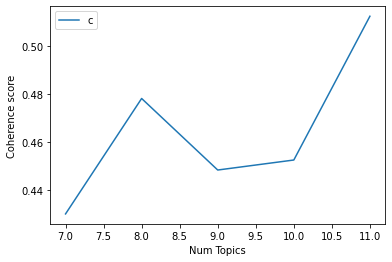

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=7, limit=12, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=12; start=7; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

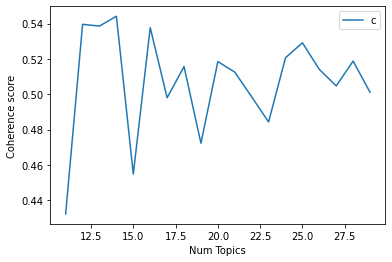

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=1, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=11, limit=30, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=11; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=50, workers=2)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text, start=1, limit=40, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()